**Build a Sentiment Analysis Model for IMDB Movie Review Dataset**

Part 1:

Load the dataset and preprocess the reviews.
a. Convert all text to lowercase.

b. Remove non-alphabetic characters (punctuation).

c. Tokenize the reviews and remove common stopwords.

d. Apply stemming to reduce words to their root form.

In [1]:
#importing necessary libraries
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Loading dataset

In [2]:
df = pd.read_csv("IMDB Dataset.csv", encoding='utf-8')
length = len(df['review'])

Text cleaning with NLTK libraries

In [3]:
corpus = []

for i in range(0, length):
    # Removing non-alphabetical characters (punctuations, numbers, etc.)
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i])

    # Converting the review to lowercase
    review = review.lower()

    # Tokenizing (splitting into words) and stemming
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]

    # Rejoining the words back into a string
    review = ' '.join(review)
    corpus.append(review)

re-verfying and cleaning data

In [4]:
data_check = df.copy()
data_check['cleanReview'] = corpus
data_check.head()

data_check['cleanReview'] = data_check['cleanReview'].str.replace('subject', '')
data_check.head()


,review,sentiment,cleanReview
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


Constrcting Feature matrix and label vector

In [5]:
x = data_check.loc[:, 'cleanReview'].values  # Features (cleaned text)
y = data_check.loc[:, 'sentiment'].values  # Labels (numeric values)
# print(data_check.columns)

Text Representation using Count Vectorization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)  # Limit to the top 1000 most frequent words
x = cv.fit_transform(x).toarray()

Final Model Building using Scikit Learn:

In [7]:
#Necessary imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Training the model

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Final Evaluation:

In [9]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8318
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.83      0.83      7411
    positive       0.83      0.84      0.83      7589

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



Confusion Matrix:

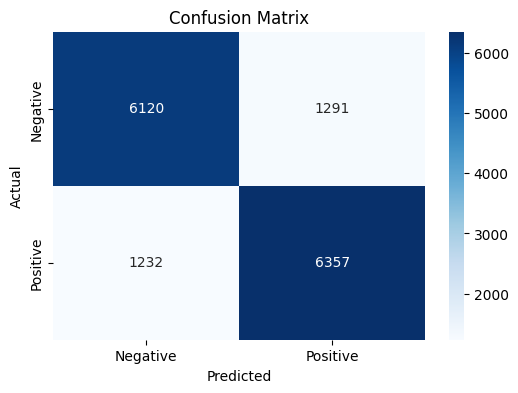

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC score:

In [12]:
# After training the model
y_pred = model.predict(X_test)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

ROC-AUC Score: 0.9026
